# M&M Hierarchical Counts -- Data Prep and Exploration

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("mm_counts_all.csv")

In [5]:
data.head()

,Timestamp,What kind of M&Ms do you have?,How many *red* M&Ms were in your bag?,How many *orange* M&Ms were in your bag?,How many *yellow* M&Ms were in your bag?,How many *green* M&Ms were in your bag?,How many *blue* M&Ms were in your bag?,How many *brown* M&Ms were in your bag?,"If there are other colours in your M&Ms, please tell us the colour and the number below:",In what country did you buy your M&Ms?,"Can you let us know the last three letters of the factory code? In the example below, this would be ""CLV""",Total number of M&Ms
0,27/06/2019 11:32:12,Milk chocolate (brown packaging),5.0,11.0,4.0,6.0,20.0,8.0,NaN,USA,CLV,54.0
1,01/07/2019 12:08:13,Milk chocolate (brown packaging),6.0,14.0,6.0,8.0,14.0,8.0,NaN,United States,CLV,56.0
2,02/07/2019 14:07:06,Milk chocolate (brown packaging),7.0,13.0,8.0,5.0,14.0,9.0,NaN,USA,CLV,56.0
3,22/07/2019 01:55:48,Milk chocolate (brown packaging),7.0,12.0,9.0,13.0,11.0,4.0,No,America,CLV,56.0
4,22/07/2019 01:56:37,Milk chocolate (brown packaging),4.0,11.0,7.0,11.0,12.0,10.0,NaN,USA,CLV,55.0


In [11]:
data = data.loc[:74]

In [14]:
data.columns

Index(['Timestamp', 'What kind of M&Ms do you have?',
       'How many *red* M&Ms were in your bag?',
       'How many *orange* M&Ms were in your bag?',
       'How many *yellow* M&Ms were in your bag?',
       'How many *green* M&Ms were in your bag?',
       'How many *blue* M&Ms were in your bag?',
       'How many *brown* M&Ms were in your bag?',
       'If there are other colours in your M&Ms, please tell us the colour and the number below:',
       'In what country did you buy your M&Ms? ',
       'Can you let us know the last three letters of the factory code? In the example below, this would be "CLV"',
       'Total number of M&Ms'],
      dtype='object')

In [15]:
new_keys = ['Timestamp', "kind", "red", "orange", "yellow", "green", "blue", "brown", "other", "country", "code", "total"]

In [16]:
data.columns = new_keys

In [17]:
data

,Timestamp,kind,red,orange,yellow,green,blue,brown,other,country,code,total
0,27/06/2019 11:32:12,Milk chocolate (brown packaging),5.0,11.0,4.0,6.0,20.0,8.0,NaN,USA,CLV,54.0
1,01/07/2019 12:08:13,Milk chocolate (brown packaging),6.0,14.0,6.0,8.0,14.0,8.0,NaN,United States,CLV,56.0
2,02/07/2019 14:07:06,Milk chocolate (brown packaging),7.0,13.0,8.0,5.0,14.0,9.0,NaN,USA,CLV,56.0
3,22/07/2019 01:55:48,Milk chocolate (brown packaging),7.0,12.0,9.0,13.0,11.0,4.0,No,America,CLV,56.0
4,22/07/2019 01:56:37,Milk chocolate (brown packaging),4.0,11.0,7.0,11.0,12.0,10.0,NaN,USA,CLV,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,20/01/2025 06:25:42,Milk chocolate (brown packaging),5.0,9.0,1.0,4.0,10.0,1.0,NaN,Netherlands,NaN,NaN
71,20/01/2025 06:25:50,Milk chocolate (brown packaging),7.0,8.0,8.0,4.0,9.0,3.0,NaN,netherlands,NaN,NaN
72,20/01/2025 06:25:52,Milk chocolate (brown packaging),9.0,4.0,5.0,9.0,4.0,5.0,NaN,Germany,NaN,NaN
73,20/01/2025 06:26:26,Milk chocolate (brown packaging),3.0,8.0,3.0,2.0,9.0,5.0,NaN,Germany,NaN,NaN


In [106]:
clv = data[(data["code"] == "CLV") | (data["code"] == "clv")]
tol = data[(data["code"] == "TOL") | (data["code"] == "TOP")]
hkp = data[(data["code"] == "HKP")]
hlk = data[(data["code"] == "HLK")]
hag = data[(data["code"] == "HAG")]

titles = ["clv", "tol", "hkp", "hlk", "hag", "germany"]
germany = data[(data["country"] == "Germany") | \
                (data["country"] == "germany") | \
                (data["country"] == "Germay")| \
                (data["country"] == "Germany ") | \
                (data["country"] == "Netherlands") |\
                (data["country"] == "netherlands")]

In [107]:
clv = clv[["kind", "red", "orange", "yellow", "green", "blue", "brown"]]
clv["code"] = "usa"
germany = germany[["kind", "red", "orange", "yellow", "green", "blue", "brown"]]
germany["code"] = "ger"

Plot the two distributions:

Text(0.5, 1.0, 'Germany')

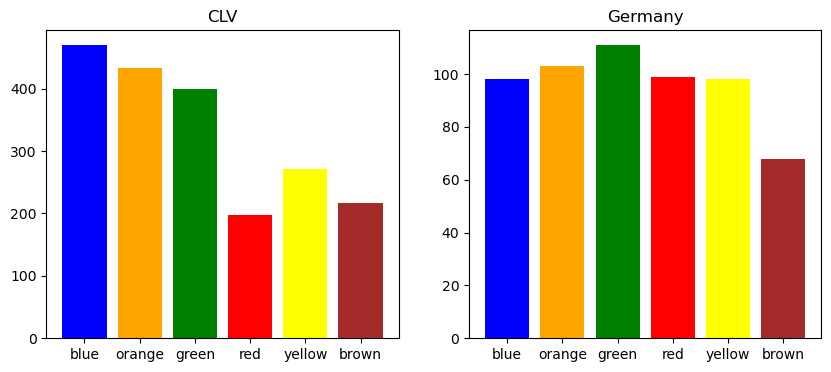

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax1.bar(labels, clv[labels].sum(axis=0), color=labels)
ax1.set_title("CLV")

ax2.bar(labels, germany[labels].sum(axis=0), color=labels)
ax2.set_title("Germany")

Combine the two data sets:

In [129]:
comb = pd.concat([clv, germany])

In [130]:
comb["total"] = comb[labels].sum(axis=1)

In [131]:
comb

,kind,red,orange,yellow,green,blue,brown,code,total
0,Milk chocolate (brown packaging),5.0,11.0,4.0,6.0,20.0,8.0,usa,54.0
1,Milk chocolate (brown packaging),6.0,14.0,6.0,8.0,14.0,8.0,usa,56.0
2,Milk chocolate (brown packaging),7.0,13.0,8.0,5.0,14.0,9.0,usa,56.0
3,Milk chocolate (brown packaging),7.0,12.0,9.0,13.0,11.0,4.0,usa,56.0
4,Milk chocolate (brown packaging),4.0,11.0,7.0,11.0,12.0,10.0,usa,55.0
5,Milk chocolate (brown packaging),2.0,14.0,5.0,13.0,13.0,8.0,usa,55.0
6,Milk chocolate (brown packaging),5.0,12.0,6.0,10.0,19.0,3.0,usa,55.0
7,Milk chocolate (brown packaging),3.0,12.0,10.0,15.0,11.0,4.0,usa,55.0
8,Milk chocolate (brown packaging),4.0,10.0,5.0,14.0,11.0,8.0,usa,52.0
9,Milk chocolate (brown packaging),3.0,15.0,12.0,9.0,11.0,6.0,usa,56.0


Let's shuffle the rows:

In [132]:
comb = comb.sample(frac=1, random_state=100)

Now we'll remove the "code" column so we can store it separately, then remove it from the data frame:

In [133]:
code = comb["code"]
comb = comb.drop("code", axis=1)

In [135]:
code.head()

6     usa
42    ger
61    ger
59    ger
49    ger
Name: code, dtype: object

Let's save this to file:

In [143]:
code = np.array(code, dtype=str).T
np.savetxt("../data/mm_code.csv", code, fmt='%s')

In [147]:
comb.to_csv("../data/mm_data.csv")

Let's load them to see if it works:

In [155]:
code_loaded = pd.read_csv("../data/mm_code.csv")

In [157]:
code_loaded.head()

,usa
0,ger
1,ger
2,ger
3,ger
4,ger


In [158]:
comb_loaded = pd.read_csv("../data/mm_data.csv")

In [159]:
comb_loaded.head()

,Unnamed: 0,kind,red,orange,yellow,green,blue,brown,total
0,6,Milk chocolate (brown packaging),5.0,12.0,6.0,10.0,19.0,3.0,55.0
1,42,Peanut (yellow packaging),6.0,11.0,16.0,14.0,9.0,7.0,63.0
2,61,Milk chocolate (brown packaging),4.0,3.0,4.0,4.0,7.0,8.0,30.0
3,59,Milk chocolate (brown packaging),7.0,4.0,6.0,4.0,0.0,5.0,26.0
4,49,Peanut (yellow packaging),1.0,2.0,3.0,0.0,2.0,0.0,8.0
